Iris Flower Classification with Decision Trees:

1. Data exploration and preparation:

1.1 Loading data and examining its structure:

In [1]:
#   Imports for data manipulation
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IRIS.csv')

Can see 4 numeric features, sepal_length, sepal_width, petal_length and petal_width. Also the target variable species which we want to use the 4 numeric features to classify which of the 3 types of species the input is. There are 0 missing values. The sepal and petal lengths are in centimeters. There are also 50 of each species in the dataset. 

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df.isna().sum())
print("\n")
print(print(df.species.value_counts()))

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64
None


1.2 Explorating dataset

Can see on average the sepal length tends to be the biggest feature is the sepals length, and the sepal tends to bigger then the petal. There is fairly little variation in the data except for petal length. The interquartile range for the petal length is really big at 3.5.

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Lets have a look at the distributions:
1. The sepals dimensions seem to be normally distributed.
2. The petals dimensions are normally distributed to the right.
3. Seems to be a big gap in the petals dimensions. Where the petal length is between 2 and 3 and the petal width is between 0.6 and 1.

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

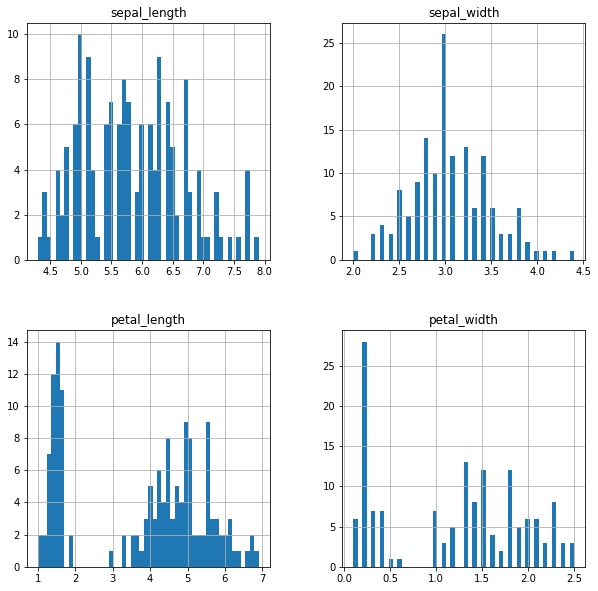

In [7]:
df.hist(figsize=(10,10), bins=50)

Lets get a better look at the distributions of each iris species:
1. can see virginica tends to have longest sepal length.
2. setosa tends to have wider sepals.
3. virginica tends to have longest petals and widest petals.
4. can see the reason for the gaps in petal length and width in the scatter plot. veriscolor doesnt have petal length less then about 2.9 and setosa doesnt have any longer then 2. same for width.

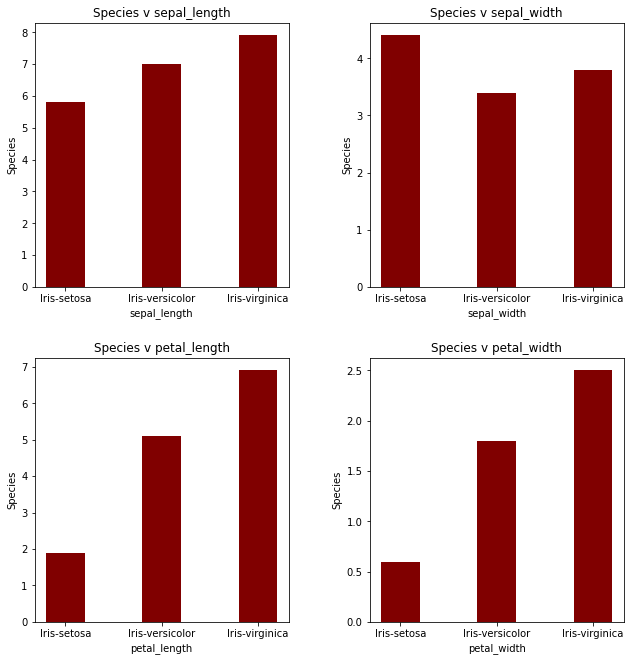

In [8]:
f, axes = plt.subplots(2,2, figsize = (10,10))
f.tight_layout(pad=5.0)

numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

k = 0
for i in range(0,2):
    for j in range(0,2):
        axes[i,j].bar(df['species'], df[numeric_cols[k]], color ='maroon', width = 0.4)
        # axes[i,j].scatter(x = numeric_cols[k], y = 'species', data = df)
        axes[i,j].set_xlabel(numeric_cols[k])
        axes[i,j].set_ylabel('Species')
        axes[i,j].set_title('Species v '+numeric_cols[k])
        k+=1

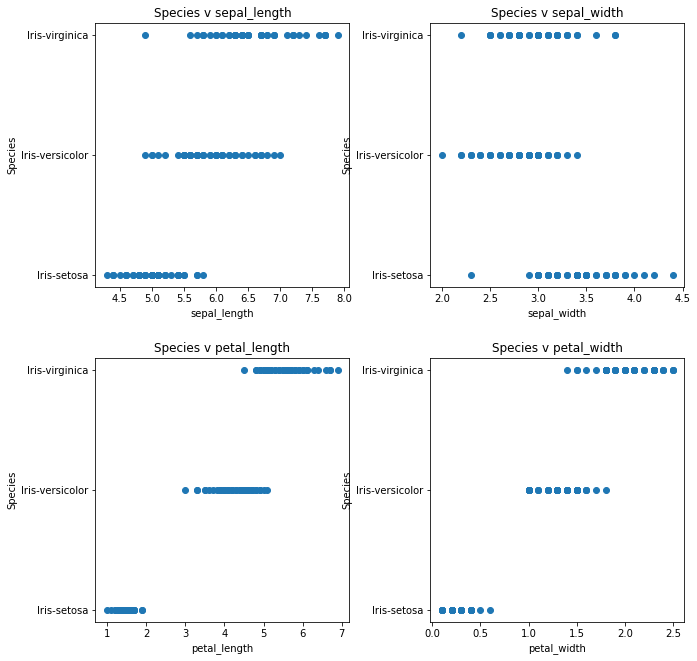

In [9]:
f, axes = plt.subplots(2,2, figsize = (10,10))
f.tight_layout(pad=5.0)

numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

k = 0
for i in range(0,2):
    for j in range(0,2):
        axes[i,j].scatter(x = numeric_cols[k], y = 'species', data = df)
        axes[i,j].set_xlabel(numeric_cols[k])
        axes[i,j].set_ylabel('Species')
        axes[i,j].set_title('Species v '+numeric_cols[k])
        k+=1

Can see from the correlation table and pairplots that there is a strong positive correlation between all the features except between sepal width and sepal length, petal length and sepal width, petal width and sepal width. There is a weak negative correlation between sepal width and sepal length, petal length and sepal width, petal width and sepal width.

In [10]:
df[numeric_cols].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


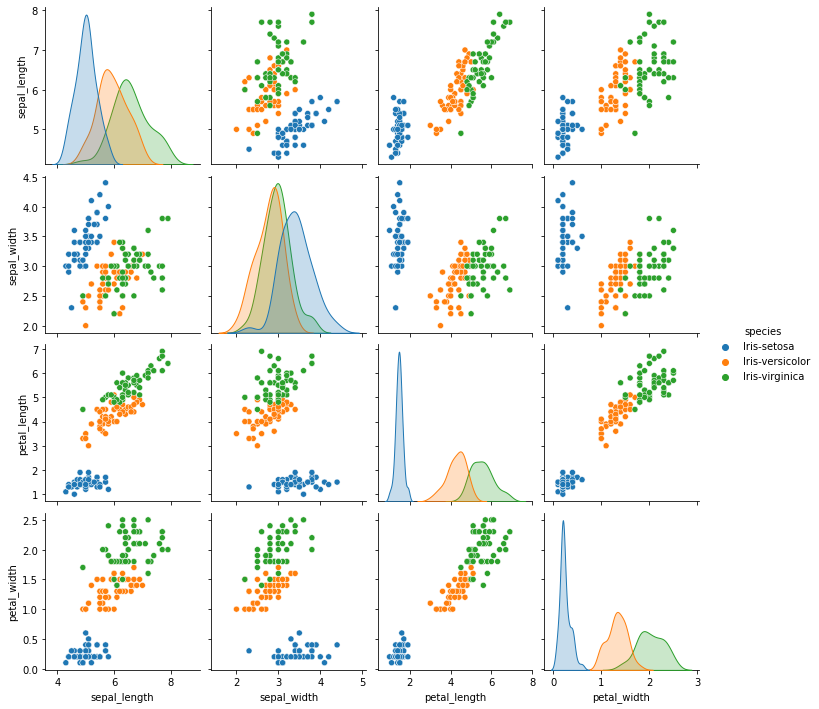

In [11]:
sns.pairplot(df,hue='species')

Can see only few outliers, dont need to remove as wont have much effect on desicion tree.

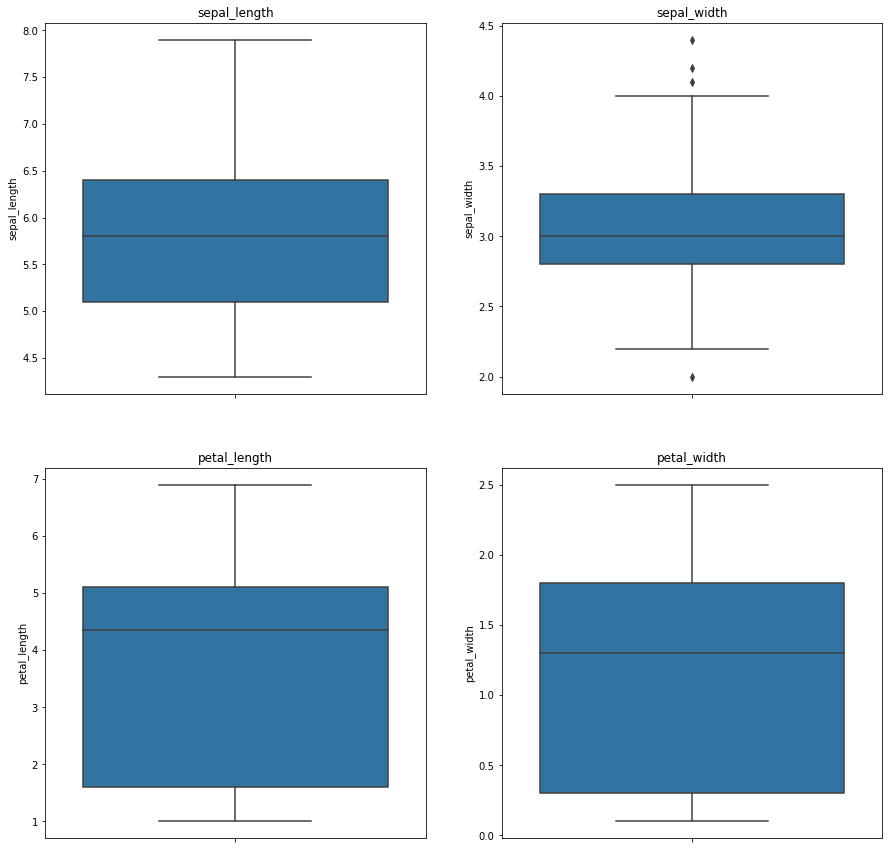

In [12]:
f, axes = plt.subplots(2,2, figsize = (15,15))

numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

k = 0
for i in range(0,2):
    for j in range(0,2):
        sns.boxplot(data = df, y = numeric_cols[k], ax = axes[i,j])
        axes[i,j].set_ylabel(numeric_cols[k])
        axes[i,j].set_title(numeric_cols[k])
        k+=1


plt.show()

1.3 Split dataset into training and testing sets.

Use sklearn train_model_selection to split data into test set and train set and train set into input x set and output y set and same with test set.

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(df.drop('species',axis=1), df['species'], test_size=0.2, random_state=5)

2. Decision Tree Implementation

2.1 Implement decision tree classifier.

I am going to use the scikit-learn desicion tree implementation for the model. I am going to split the tree based on the information gain from each split using entropy. The random_state parameter is to make the random splitting deterministic so the training is the same each time the model is trained. This is needed as the best found split may vary across different runs. I am going to start with both the main hyperparameters, max_depth and max_leaf_nodes set to 5 to see the improvement in the classification metrics.

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state = 13, max_depth=5, max_leaf_nodes=5)

2.2 Train Decision tree classifer

I am going to train the model using the fit method, which builds a decision tree classifier from the training set. It will use the labeled datasets i.e. each x_train tuple with its corresponding y_train value to train the decsion tree to classify data.

In [15]:
model.fit(x_train, y_train)
predicted = model.predict(x_test)

2.3 Tune Hyperparameters

I am going to define a function that prints some metrics which I'll explain later, that help understand how well the model has done. The function works by taking the predicted set of y values i.e. the predicted species and compares them to the actual y values.

In [16]:
import sklearn.metrics as metrics

def measure_model(predicted):
    accuracy = metrics.accuracy_score(predicted, y_test)
    precision = metrics.precision_score(y_test,predicted, average='weighted')
    recall = metrics.recall_score(y_test,predicted, average='weighted')
    f1_score = metrics.f1_score(y_test, predicted, average='weighted')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 score: {f1_score}')

measure_model(predicted)

Accuracy: 0.8666666666666667
Precision: 0.8666666666666667
Recall: 0.8666666666666667
F1 score: 0.8666666666666667


I am going to search a small subset of the possible (max_depth, max_leaf_nodes) pairs to find the optimum combination. I will train the model with each pair and if the accuracy is better i will use the current combination.

In [17]:
max_accuracy = 0
max_leafNodes = 0
max_depth = 0
for depth in range(1,30):
    for num_leaf_nodes in range(2,30):
        model2 = DecisionTreeClassifier(criterion='entropy', max_depth=depth, max_leaf_nodes=num_leaf_nodes, random_state=42)
        model2.fit(x_train, y_train)
        predicted2 = model2.predict(x_test)
        accuracy = metrics.accuracy_score(y_test,predicted2)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_leafNodes = num_leaf_nodes
            max_depth = depth
  
max_leafNodes, max_depth

(3, 2)

2.4 Testing with Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=20, random_state=43)
rf.fit(x_train, y_train)
predicted_rf = rf.predict(x_test)

3. Model Evaluation

3.1 Predicting test data

I am going to make the model using the best hyperparameters found in section 2. I am going to use the predict method on the model on the x_test dataset to get the predicted y values. Below can see first the predicted y values for the x_test set, as well as the actual y values as numpy arrays. Optimum was 3 leaf nodes and 2 max depth but will change to 10 and 10 so each leaf contains only one class. Note this doesnt improve result on test data as hyperparameters only picked based on accuracy but could have improvements on recall and precision.

In [19]:
model = DecisionTreeClassifier(criterion='entropy', random_state = 13, max_depth=10, max_leaf_nodes=10)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
predicted, y_test.to_numpy()

(array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
       dtype=object),
 array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
        'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 

I am using the measure_model function defined earlier to get some metrics on the models performance at classifying the test data. The first metric is accuracy which is calculated by the total correct desicions out of all the desisions made. The accuracy is calculated by getting the number of true positives and true negatives out of all decisions made. True Positives and True Negatives are the elements correctly classified by the model. The precision is the ratio true positives / (true positives + false positives). The precision is the ability of the classifier not to label as positive a sample that is negative. Recall in multi-class classification is the fraction of instances in a class that the model correctly classified out of all instances in that class. The F1 score is the harmonic mean of the precision and recall. It thus symmetrically represents both precision and recall in one metric. The highest possible value of an F1-score is 1.0, indicating perfect precision and recall. Precision, recall and F1 score are weighted meaning a weighted average of the scores of each class are calculated.
1. Accuracy: Can see model gets 9/10 desicions right.
2. Precision: About 90% of what was predicted a species was apart of that species.
3. Recall: 90% of postives were predicted positive.
4. F1-score: recall and precision are both high.
5. Can see big improvement from tuning hyperparameters.

In [20]:
measure_model(predicted)

Accuracy: 0.9
Precision: 0.9022222222222224
Recall: 0.9
F1 score: 0.8997929606625258


Better seen by classification report on each class.

In [21]:
print(metrics.classification_report(y_test, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



Can see no clear improvement by using a random forest, perhaps because data is very simplistic or maybe hyperparameters need to be tuned.

In [22]:
measure_model(predicted_rf)

Accuracy: 0.9
Precision: 0.9022222222222224
Recall: 0.9
F1 score: 0.8997929606625258


4. Visualization

4.1 Decision tree structure 

I am going to use the plot_tree method to visualize the decision tree. Can see as data is continuous, the splitting is done based on inequalities. First split based on the petal width <= 0.8. The entropy here is 1.584 and contains all the data. The left child is a leaf so therefor the entropy is 0. Can see it contains all the values of class 1. It is split further by petal width and then sepal length and width until all leaves contain elements of one species. Note petal length never used in split as information gain never worth it. 

[Text(1674.0, 996.6, 'petal_width <= 0.8\nentropy = 1.584\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(1116.0, 815.4000000000001, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(2232.0, 815.4000000000001, 'petal_width <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(1674.0, 634.2, 'petal_width <= 1.45\nentropy = 0.371\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(1116.0, 453.0, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(2232.0, 453.0, 'sepal_width <= 2.6\nentropy = 0.75\nsamples = 14\nvalue = [0, 11, 3]'),
 Text(1116.0, 271.79999999999995, 'sepal_length <= 6.1\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(558.0, 90.59999999999991, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(1674.0, 90.59999999999991, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(3348.0, 271.79999999999995, 'sepal_length <= 7.05\nentropy = 0.439\nsamples = 11\nvalue = [0, 10, 1]'),
 Text(2790.0, 90.59999999999991, 'entropy = 0.0\nsamples = 10\nva

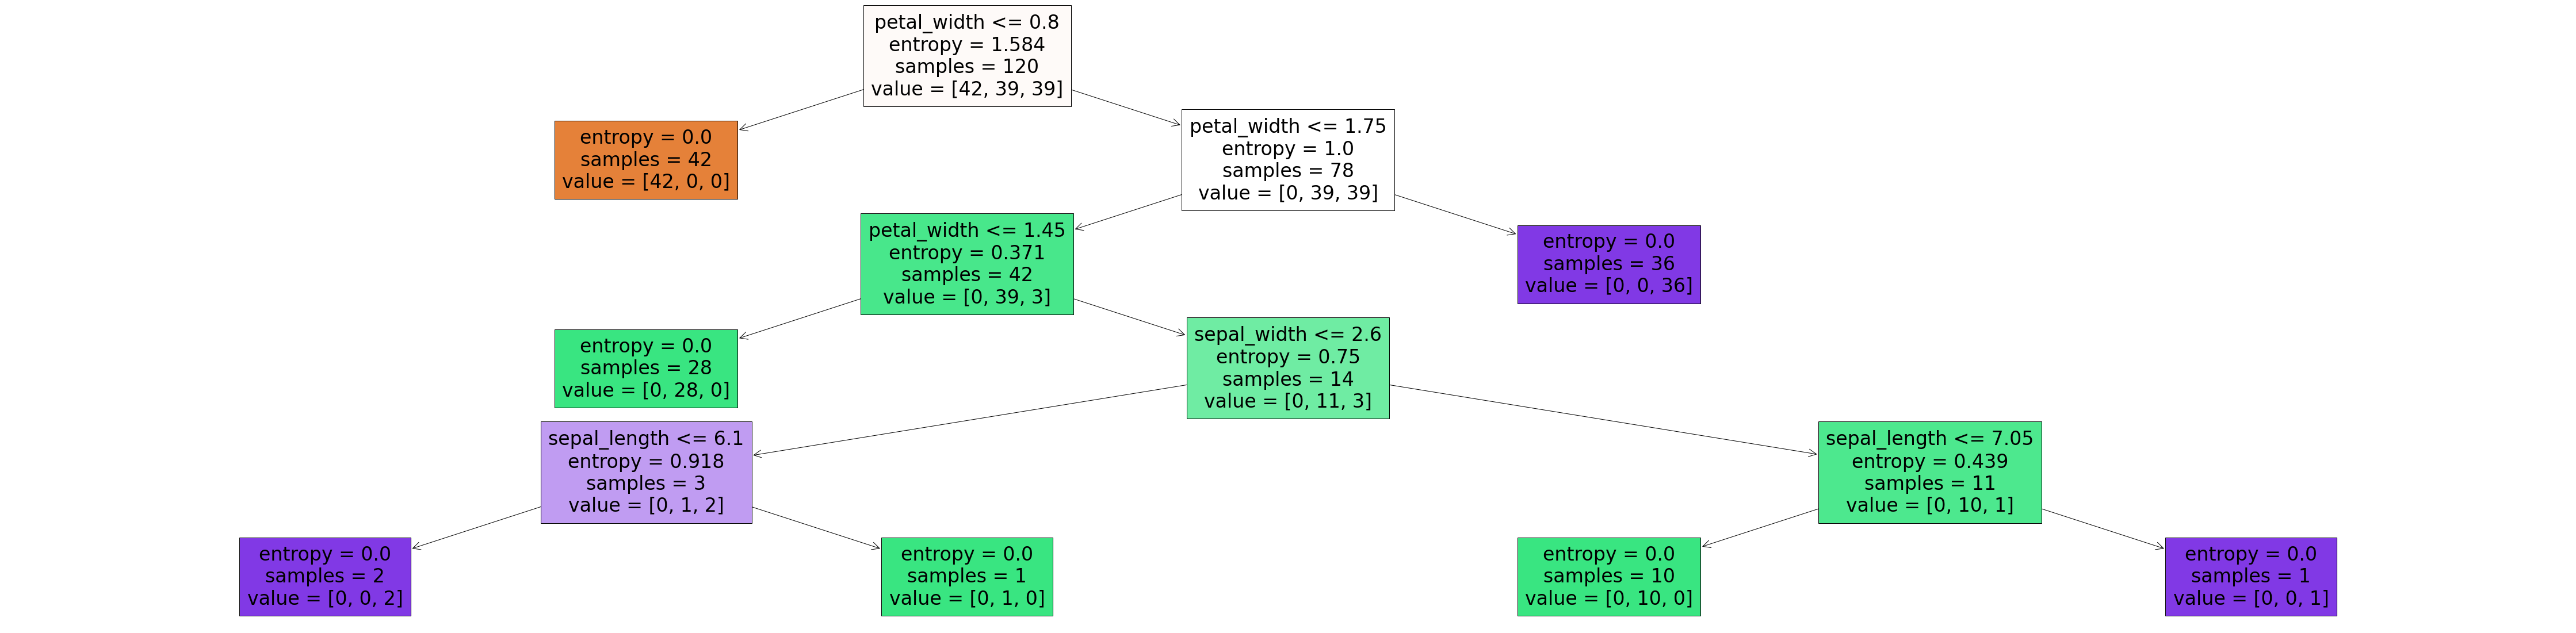

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize =(80,20))

plot_tree(model, feature_names=x_train.columns.tolist(), filled=True)

5 Discussion and Conclusion

5.1 Summarize the key findings from your analysis

1. Data Summary: 

The dataset contains information about iris flowers, including sepal length, sepal width, petal length, petal width, and species. 

The dataset has no missing values, as indicated by the "0" count for each column. 

There are 150 data entries in the dataset. 

The dataset has four numerical features (sepal_length, sepal_width, petal_length, petal_width) and one categorical feature (species). 

The "species" column is the target variable, and it is categorized into three classes: Iris-setosa, Iris-versicolor, and Iris-virginica. 

Each class contains 50 instances, indicating a balanced dataset. 

Descriptive Statistics: 

Descriptive statistics provide information about the central tendency and spread of the numerical features: 

Sepal length has a mean of approximately 5.84 and a standard deviation of about 0.83. 

Sepal width has a mean of approximately 3.05 and a standard deviation of about 0.43. 

Petal length has a mean of approximately 3.76 and a standard deviation of about 1.76. 

Petal width has a mean of approximately 1.20 and a standard deviation of about 0.76. 

 
 

2. Feature Correlation: 

The correlation matrix or pair plot shows the relationships between the numerical features. Notable correlations: 

Strong positive correlation between petal length and petal width. 

Moderate positive correlation between petal length and sepal length, petal width and sepal length, and petal width and sepal width. 

 
 

3. Machine Learning Model Evaluation: 

The model's accuracy is approximately 0.9. 

The precision, recall, and F1 score are also around 09, indicating a well-balanced model performance. 

The performance was considerably improved by tuning hyperparameters. 

The random forest model had no clear improvement in performance, perhaps because the data is too simplistic. 

 
 

4. Decision Tree Structure: 

The decision tree consists of nodes and branches that split the data based on feature conditions. 

The tree is binary and seems to focus primarily on the "petal_width" and "sepal_length" features. 

It makes splits based on information gain (entropy) by splitting data, to classify the data into the three iris species. 

The splitting is done based on inequalities. First split based on the petal width <= 0.8. The entropy here is 1.584 and contains all the data 

 
 

 